In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
data=pd.read_csv('/content/drive/MyDrive/nlp/fake new classifier dataset/train.csv/train.csv')

In [ ]:
data.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [ ]:
data.shape

(20800, 5)

In [ ]:
x = data.drop(['label'], axis=1)

In [ ]:
x.head()

,id,title,author,text
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...


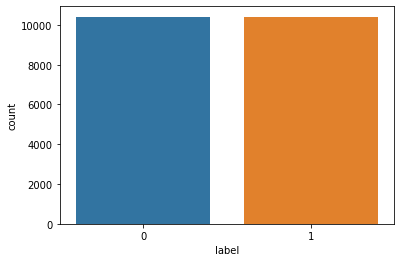

In [ ]:

sns.countplot(x='label',data=data)

In [ ]:
data.isna().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [ ]:
data.dropna(inplace=True)
data.head(10)


,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1
5,5,Jackie Mason: Hollywood Would Love Trump if He...,Daniel Nussbaum,"In these trying times, Jackie Mason is the Voi...",0
7,7,Benoît Hamon Wins French Socialist Party’s Pre...,Alissa J. Rubin,"PARIS — France chose an idealistic, traditi...",0
9,9,"A Back-Channel Plan for Ukraine and Russia, Co...",Megan Twohey and Scott Shane,A week before Michael T. Flynn resigned as nat...,0
10,10,Obama’s Organizing for Action Partners with So...,Aaron Klein,"Organizing for Action, the activist group that...",0
11,11,"BBC Comedy Sketch ""Real Housewives of ISIS"" Ca...",Chris Tomlinson,The BBC produced spoof on the “Real Housewives...,0


In [ ]:
data.isna().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [ ]:
import nltk
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords

In [ ]:
stemmer = PorterStemmer()

In [ ]:
messages = data.copy()
messages.reset_index(inplace = True)


In [ ]:
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
stopwords = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import re
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]', ' ', messages['title'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)



In [ ]:
corpus[:10]

['hous dem aid even see comey letter jason chaffetz tweet',
 'flynn hillari clinton big woman campu breitbart',
 'truth might get fire',
 'civilian kill singl us airstrik identifi',
 'iranian woman jail fiction unpublish stori woman stone death adulteri',
 'jacki mason hollywood would love trump bomb north korea lack tran bathroom exclus video breitbart',
 'beno hamon win french socialist parti presidenti nomin new york time',
 'back channel plan ukrain russia courtesi trump associ new york time',
 'obama organ action partner soro link indivis disrupt trump agenda',
 'bbc comedi sketch real housew isi caus outrag']

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
vectorizer = CountVectorizer(max_features=10,lowercase=False)
tf_idf_transformer = TfidfTransformer()

In [ ]:
tf_idf = tf_idf_transformer.fit_transform(vectorizer.fit_transform(corpus))
x = tf_idf.toarray()

In [ ]:
x_train_weight.shape

(18285, 10)

In [ ]:
y = messages.label

In [ ]:
y.shape

(18285,)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x_train_weight,y,test_size=0.2, random_state=0)

# Naive ***Bayes***

In [ ]:
from sklearn.naive_bayes import MultinomialNB
nb = MultinomialNB()
model=nb.fit(X_train,y_train)

In [ ]:
model.score(X_train,y_train)

0.6754853705222861

In [ ]:
model.score(X_test,y_test)

0.6773311457478808

In [ ]:
y_pred = nb.predict(X_test)


# ***Logisitc Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression()

In [ ]:
model2=lr.fit(X_train,y_train)

In [ ]:
model2.score(X_train,y_train)

0.8993027071369976

In [ ]:
model2.score(X_test,y_test)

0.9012852064533771

# ***Prediction***

In [ ]:
def predict_fake_news(news):
  #cleaning test data
    news = re.sub('[^a-zA-Z]', ' ', news)
    news = news.lower()
    news = news.split()
    news = [stemmer.stem(word) for word in news if not word in set(stopwords.words('english'))]
    news = ' '.join(news)
    temp = vectorizer.transform([news]).toarray()
    return lr.predict(temp)

In [ ]:
pred_test_data= pd.read_csv('/content/drive/MyDrive/nlp/fake new classifier dataset/test.csv/test.csv')

In [ ]:
title = pred_test_data['title']

In [ ]:
title.shape

(5200,)

In [ ]:
from random import randint

In [ ]:
row = randint(0, title.shape[0]-10)
news = title[row]

print('News: {}'.format(news),'\n')
if predict_fake_news(news):
  print('Prediction: This is a Fake news!')
else:
  print('Prediction: This is a Real news.')


News: Is One Of Richard Russell’s Last And Most Shocking Predictions Now Unfolding? 

Prediction: This is a Fake news!
